In [1]:
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import datetime
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')


C:\Users\yjhon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\yjhon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index_col='공고게시일자')

In [3]:
df.index = df.index.astype(str)

df.index = pd.to_datetime(df.index)

In [123]:
water_df = df[df.수요기관명 == "한국수자원공사"] # 용역
water_df_service = water_df[water_df.대상 == "용역"]

In [124]:
col_name = ["추정가격"]
water_service = pd.DataFrame(data = water_df_service,columns = col_name)

In [125]:
water_service['date'] = water_service.index
water_service.dtypes

water_service['date'] = water_service['date'].astype(str)

water_service['date'] = pd.to_datetime(water_service['date'])

water_groups = water_service.groupby(["date"]).추정가격.sum()
water_group_df = pd.DataFrame(data=water_groups, index = water_groups.index)

water_group_df.tail()

,추정가격
date,
2021-12-27,162250600.00
2021-12-28,306701000.00
2021-12-29,361531000.00
2021-12-30,689758200.00
2021-12-31,3045898000.00


In [126]:
water_sample = water_group_df.resample(rule='w').sum()

In [127]:
water_sample = water_sample[water_sample.추정가격!=0] # 0값 제외한 데이터프레임

In [128]:
water_sample

,추정가격
date,
2018-04-08,1213394500.00
2018-04-15,2100809455.00
2018-04-22,5161653780.00
2018-04-29,1889171056.00
2018-05-06,8386696600.00
...,...
2021-12-05,15323871280.00
2021-12-12,15572623196.00
2021-12-19,23078195505.00


Text(0.5, 1.0, '한국수자원공사 용역 추정가격_week')

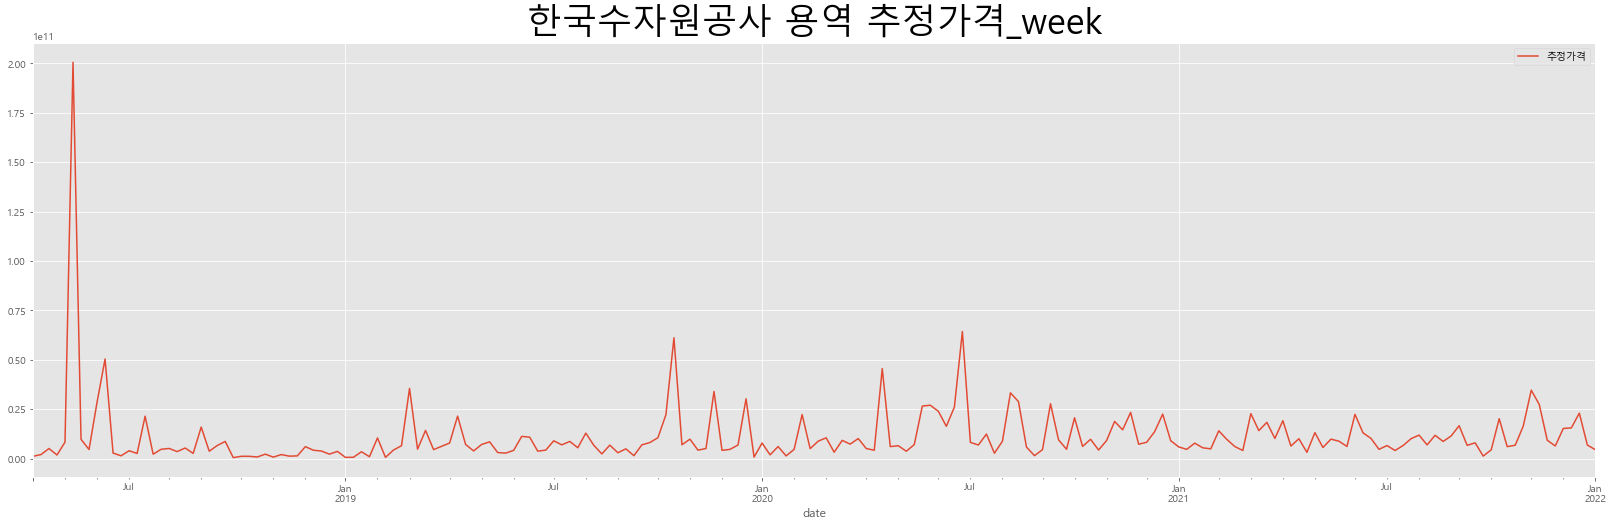

In [129]:
water_sample.plot(figsize=(28,8))
plt.title("한국수자원공사 용역 추정가격_week",fontsize=35)

In [130]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(water_sample[1:])
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -13.060865
p-value : 0.000000
Critical values:
	1%:-3.465
	5%:-2.877
	10%:-2.575


In [131]:
# 검정통계량(ADF Statistics)가 Critical Value 보다 작으면 Stationary한 데이터
# 혹은 p-value가 설정한 신뢰수준 값 (0.05)보다 작으면 Stationary한 데이터

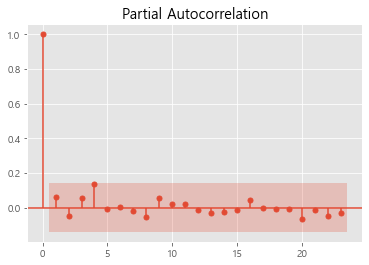

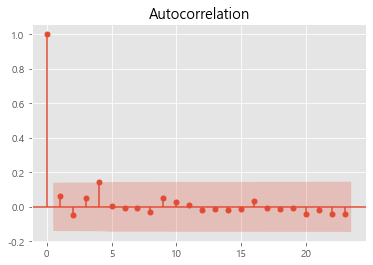

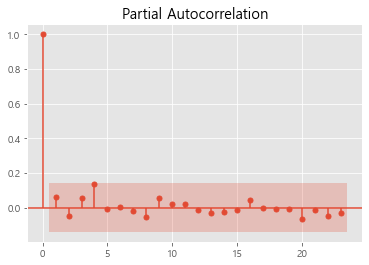

In [132]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(water_sample.추정가격)
plot_pacf(water_sample.추정가격)

<AxesSubplot:xlabel='date'>

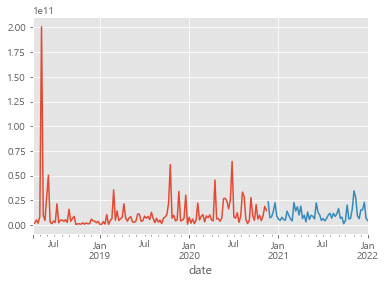

In [133]:
y_train = water_sample['추정가격'][:int(0.7*len(water_sample))]
y_test = water_sample['추정가격'][int(0.7*len(water_sample)):]
y_train.plot()
y_test.plot()

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 0


In [137]:
# model = pm.auto_arima(y = y_train        # 데이터
#                       , d = 2            # 차분 차수, ndiffs 결과!
                      
#                       , start_p = 1 
#                       , max_p = 15   
#                       , start_q = 5 
#                       , max_q = 5   
#                       , m = 3       
#                       , seasonal = True # 계절성 ARIMA가 아니라면 필수!
#                       , stepwise = True
#                       , trace=True
#                       #, trend = True
#                       )
# model.fit(y_train)

In [136]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , D = 1
                      , start_p = 0 
                      , max_p = 5   
                      , start_q = 0 
                      , max_q = 5   
                      , m = 52       
                      , seasonal = True # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      #, trend = True
                      )
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=4285.685, Time=2.40 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=4333.344, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=4275.414, Time=1.94 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=4251.124, Time=2.18 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=4279.681, Time=0.25 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=4251.653, Time=3.45 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=4251.278, Time=8.61 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=4253.205, Time=2.67 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=4253.238, Time=14.06 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=1.70 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=4251.911, Time=3.33 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=inf, Time=4.01 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=1.49 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=inf, Time=5.48 sec
 ARIMA(0,1,1)(0,1,1)[52] intercept   :

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 52),
      suppress_warnings=True, with_intercept=False)

In [17]:
#model = pm.auto_arima (y_train, d = 0, seasonal = False, trace = True)
#model.fit(y_train)

In [138]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  137
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -2122.562
Date:                            Sun, 20 Feb 2022   AIC                           4251.124
Time:                                    17:30:21   BIC                           4258.416
Sample:                                         0   HQIC                          4254.055
                                            - 137                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9534      0.193     -4.934      0.000      -1.332      -0.575
ma.S.L52      -0.5796      0.088   

Prob (Q) 값을 보면 0.54이므로 유의수준 0.05에서 귀무가설을 기각하지 못합니다. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로, 위 결과를 통해 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인할 수 있습니다.

Jarque-Bera (JB) 자크-베라 검정 통계량은 잔차가 정규성을 띠는지 검정한 통계량입니다.

Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각합니다. Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로, 위 결과를 통해 “잔차가 정규성을 따르지 않음”을 확인할 수 있습니다.



Heteroskedasticity (H) 이분산성 검정 통계량은 잔차가 이분산을 띠지 않는지 검정한 통계량입니다.

또한, 잔차가 정규분포를 따른다면, 경험적으로

비대칭도 (Skew)는 0에 가까워야 하고
첨도 (Kurtosis)는 3에 가까워야 합니다.

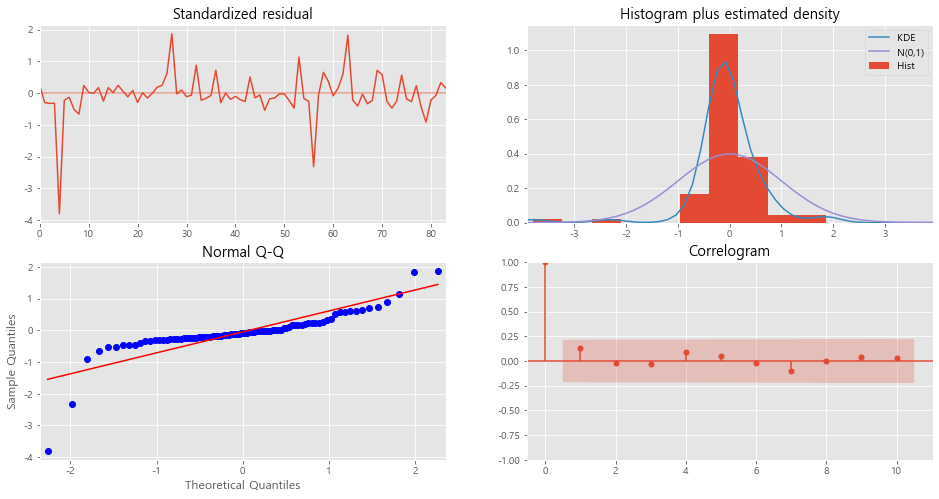

In [139]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

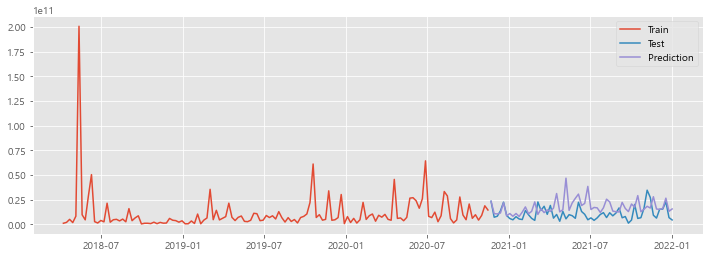

In [140]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

이것이 저희가 원하는 예측 결과일까요? 왜 이렇게 예측되었을까요?

이에 대한 답은 이 곳 에서 찾을 수 있었습니다. auto_arima 모형으로 찾은 ARIMA 모형은 ARIMA (0,1,0) 모형으로, 1차 차분 시 백색 잡음인 모형입니다. 결국 아래 식처럼 상수항이 없는 임의 보행 모형 (Random Walk Model)을 따른다는 것을 알 수 있습니다.

 예측을 할 때 innovation term인 ϵt의 기댓값이 0이기 때문에 이 부분을 0으로 대체하게 됩니다. 따라서, 예측치들은 결국 가장 마지막 관측치가 되는 것이죠. 결국, ϵt 부분은 0으로 대체되고, 임의 보행 모형에서는 예측치들이 가장 마지막 관측치로 동일하기 때문에 일직선을 얻게 되는 것입니다.




따라서 한번에 테스트 데이터를 예측하는 것이 아니라, 한 스텝씩 예측하고, 테스트 데이터를 “관측”할 때마다 모형을 업데이트해주는 REFRESH 전략을 쓸 것입니다.

## 1차 모델 적합 후 검증

0.5876697790324374


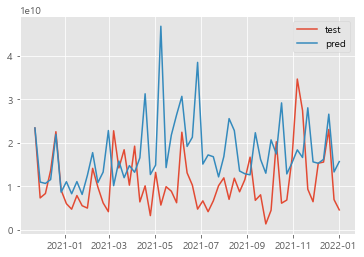

-2.0752006490976576


In [146]:
plt.plot(y_test,label="test")
plt.plot(y_predict,label="pred")
plt.legend()
plt.show()

from sklearn.metrics import r2_score

R2 = r2_score(y_test,y_predict)
print(R2)

In [147]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test[:14]
y_pred_temp_val = y_predict[:14]

R2 = r2_score(y_test_temp_val,y_pred_temp_val)
print(R2)

0.5876697790324374


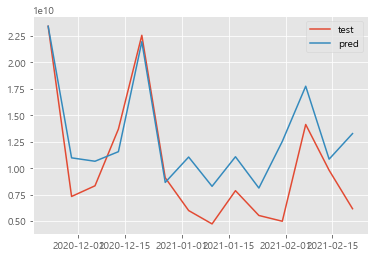

In [148]:
plt.plot(y_test_temp_val,label="test")
plt.plot(y_pred_temp_val,label="pred")
plt.legend()
plt.show()

## 2차 모델 적합 후 검증

In [87]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [149]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [150]:
test_pred=pd.DataFrame({"test": y_test, "pred": y_pred})
#test_pred #11061990545.46

<AxesSubplot:xlabel='date'>

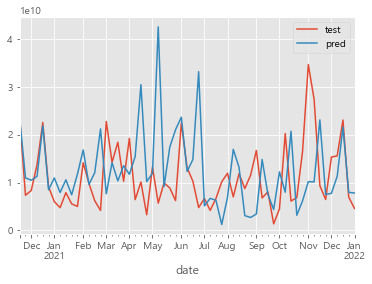

In [151]:
test_pred.plot()

In [155]:
from sklearn.metrics import r2_score

y_test_temp_val = y_test[:14]
y_pred_temp_val = y_pred[:14]

R2 = r2_score(y_test_temp_val,y_pred_temp_val)
print(R2)

0.6762656650010376


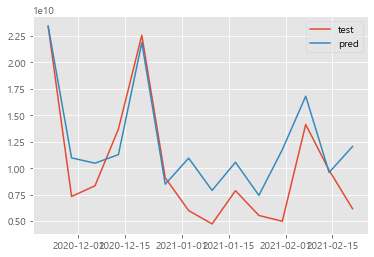

In [156]:
plt.plot(y_test_temp_val.index,y_test_temp_val,label="test")
plt.plot(y_test_temp_val.index,y_pred_temp_val,label="pred")
plt.legend()
plt.show()

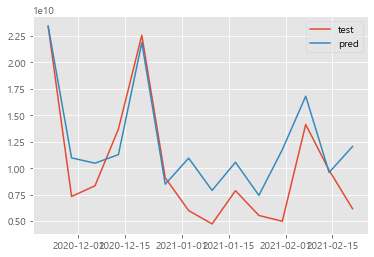

In [157]:
y_pred_temp_val_df = pd.DataFrame(y_pred_temp_val,index=y_test_temp_val.index)
plt.plot(y_test_temp_val,label='test')
plt.plot(y_pred_temp_val_df,label="pred")
plt.legend()
plt.show()

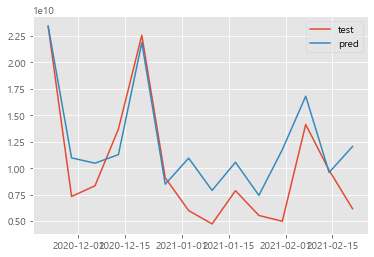

In [158]:
plt.plot(y_test_temp_val.index, y_test_temp_val, label="test")
plt.plot(y_test_temp_val.index, y_pred_temp_val,label="pred")
plt.legend()
plt.show()

In [83]:
#train 확인용 // 실행 노노노
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_train:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

<AxesSubplot:xlabel='date'>

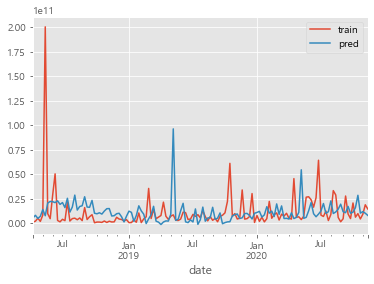

In [84]:
train_temp=pd.DataFrame({"train": y_train, "pred": y_pred})
train_temp.plot()

In [72]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
print(R2)

-1.0743643721452454


In [ ]:
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

In [267]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(datetime.today(), periods=100).tolist()

In [278]:
y_predict = model.predict(n_periods=len(datelist)) 
y_predict = pd.DataFrame(y_predict,index = datelist,columns=['Prediction'])

<AxesSubplot:>

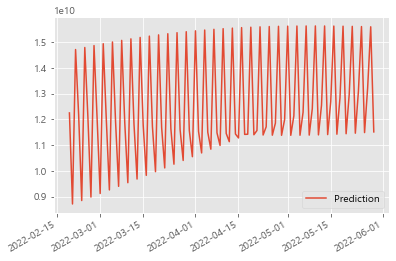

In [279]:
y_predict.plot()

In [280]:
#  ARIMA는 가까운 미래를 예측할 때 활용하는 것이 일반적이다.
# 장기 예측값은 단기 예측값에 비해 신뢰성이 적다.

In [289]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  196
Model:             SARIMAX(2, 2, 0)x(0, 0, [1], 3)   Log Likelihood               -4923.406
Date:                             Sat, 19 Feb 2022   AIC                           9854.811
Time:                                     01:30:46   BIC                           9867.882
Sample:                                          0   HQIC                          9860.104
                                             - 196                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0082      0.024    -41.994      0.000      -1.055      -0.961
ar.L2         -0.9911      

In [27]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="한국수자원공사_용역_ARIMA(2,2,0)모형")
fig.show()

In [167]:
y_test.index

DatetimeIndex(['2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07',
               '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07',
               '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04',
               '2021-04-11', '2021-04-18', '2021-04-25', '2021-05-02',
               '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30',
               '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27',
               '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25',
               '2021-08-01', '2021-08-08', '2021-08-15', '2021-08-22',
               '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19',
               '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17',
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14',
               '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12',
      

In [28]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test.values, y_pred)
print(R2)

-0.6604368210819342


In [29]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred)**0.5

In [30]:
np.sqrt(RMSE)

93285.23879023272

In [31]:
def MPE(y_true, y_pred): 
    return np.mean((y_test - y_pred) / y_test) * 100
MPE(y_test, y_pred)

-34.24968260925552

음수의 값임으로, 모델이 overperformance임을 알 수있습니다.

In [32]:
from sklearn.metrics import mean_absolute_error 




mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
rmse = mse ** 0.5 
r2 = r2_score(y_test, y_pred)

print("raw")
print("===> mse:",mse)
print("===> mae:",mae)
print("===> rmse:",rmse)
print("===> r2:",r2)

raw
===> mse: 7.572716706656263e+19
===> mae: 6802587491.1102705
===> rmse: 8702135776.15074
===> r2: -0.6604368210819342


In [33]:
def Mpe(y,pred):
    return np.mean((y-pred)/y)*100
print(Mpe(y_test,y_pred))

-34.24968260925552


# 결론 

log 변환 시킨 데이터로 학습시켰을 때보다 raw 데이터로 학습시킨 모델의 성능이 더 좋게 나왔다.

# 로우데이터의 왜도가 심해서 로그변환을 해보았다.

<AxesSubplot:xlabel='date'>

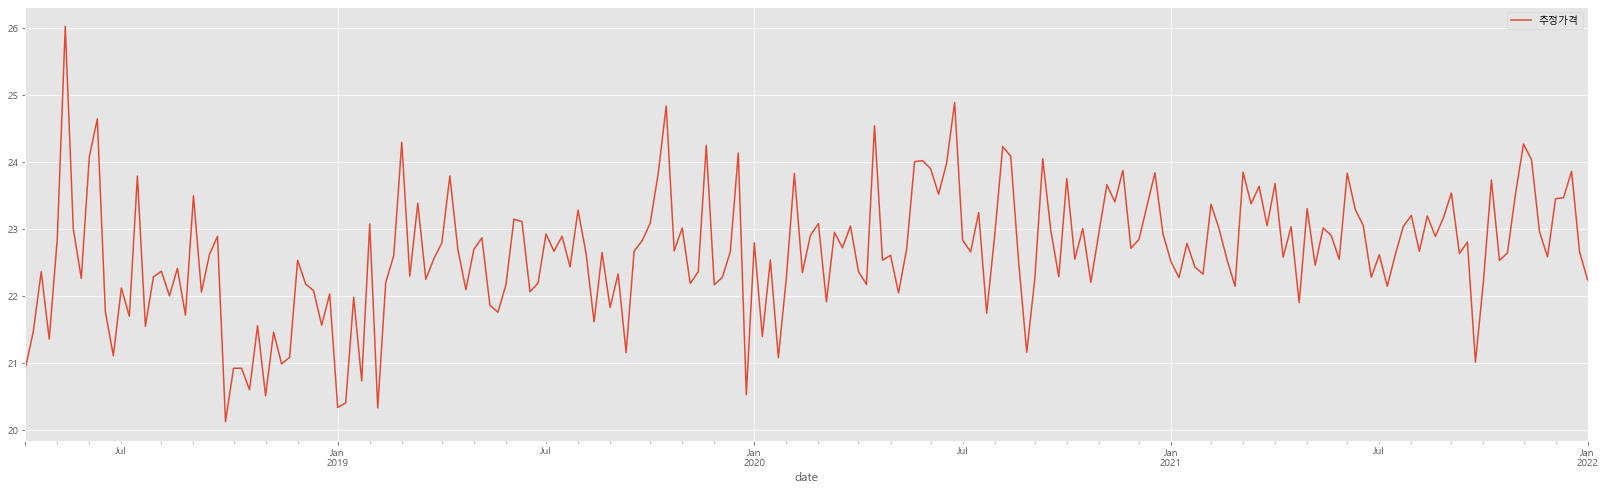

In [123]:
water_sample_log = np.log(water_sample)
water_sample_log.plot(figsize=(28,8))

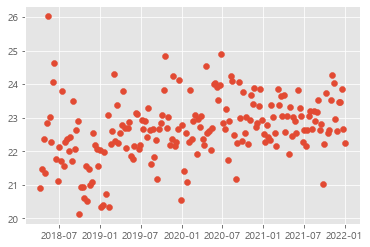

In [124]:
plt.scatter(water_sample_log.index,water_sample_log)

In [125]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(water_sample_log[1:])
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -4.390122
p-value : 0.000309
Critical values:
	1%:-3.465
	5%:-2.877
	10%:-2.575


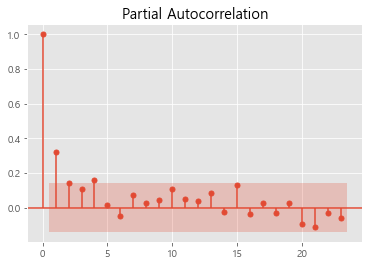

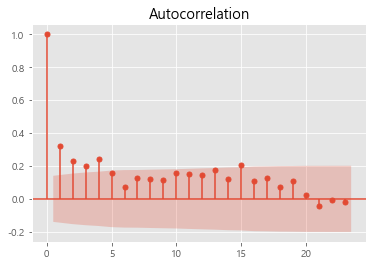

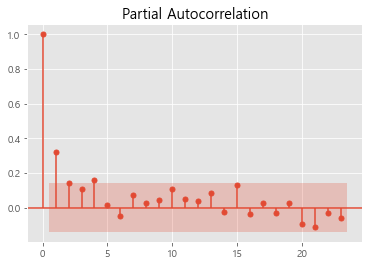

In [126]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(water_sample_log.추정가격)
plot_pacf(water_sample_log.추정가격)

<AxesSubplot:xlabel='date'>

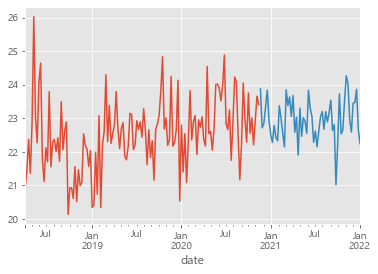

In [127]:
y_train_log = water_sample_log['추정가격'][:int(0.7*len(water_sample))]
y_test_log = water_sample_log['추정가격'][int(0.7*len(water_sample)):]
y_train_log.plot()
y_test_log.plot()

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

kpss_diffs = ndiffs(y_train_log, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train_log, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [198]:
model = pm.auto_arima(y = y_train_log        # 데이터
                      , d = 2            # 차분 차수, ndiffs 결과!
                      , start_p = 3 
                      , max_p = 5   
                      , start_q = 0 
                      , max_q = 5   
                      , m = 2  #계절적 차분이 필요할 때 쓸 수 있는 모수, 
                      # m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.
                      , seasonal = True # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )
model.fit(y_train_log)

Performing stepwise search to minimize aic
 ARIMA(1,2,0)(1,0,1)[2]             : AIC=inf, Time=0.46 sec
 ARIMA(0,2,0)(0,0,0)[2]             : AIC=585.282, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[2]             : AIC=480.878, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[2]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[2]             : AIC=516.076, Time=0.02 sec
 ARIMA(1,2,0)(2,0,0)[2]             : AIC=479.547, Time=0.08 sec
 ARIMA(1,2,0)(2,0,1)[2]             : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(2,0,0)[2]             : AIC=586.152, Time=0.05 sec
 ARIMA(1,2,1)(2,0,0)[2]             : AIC=inf, Time=0.38 sec
 ARIMA(0,2,1)(2,0,0)[2]             : AIC=inf, Time=0.32 sec
 ARIMA(1,2,0)(2,0,0)[2] intercept   : AIC=481.540, Time=0.12 sec

Best model:  ARIMA(1,2,0)(2,0,0)[2]          
Total fit time: 2.111 seconds


ARIMA(order=(1, 2, 0), scoring_args={}, seasonal_order=(2, 0, 0, 2),
      suppress_warnings=True, with_intercept=False)

In [736]:
#아예 안정하고 디폴트값으로 설정
model = pm.auto_arima(y = y_train_log        # 데이터
                      , d = 2
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = False
                      , trace=True
                      )

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=587.281, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=518.074, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=487.988, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=459.472, Time=0.08 sec
 ARIMA(3

In [135]:
model = pm.auto_arima (y_train_log, d = 2, seasonal = True, stepwise = True, trace = False)
model.fit(y_train_log)

ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [136]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -211.757
Date:                Fri, 18 Feb 2022   AIC                            435.514
Time:                        17:28:25   BIC                            452.946
Sample:                             0   HQIC                           442.598
                                - 137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3865      0.093    -14.904      0.000      -1.569      -1.204
ar.L2         -1.3792      0.171     -8.087      0.000      -1.713      -1.045
ar.L3         -1.1076      0.191     -5.814      0.0

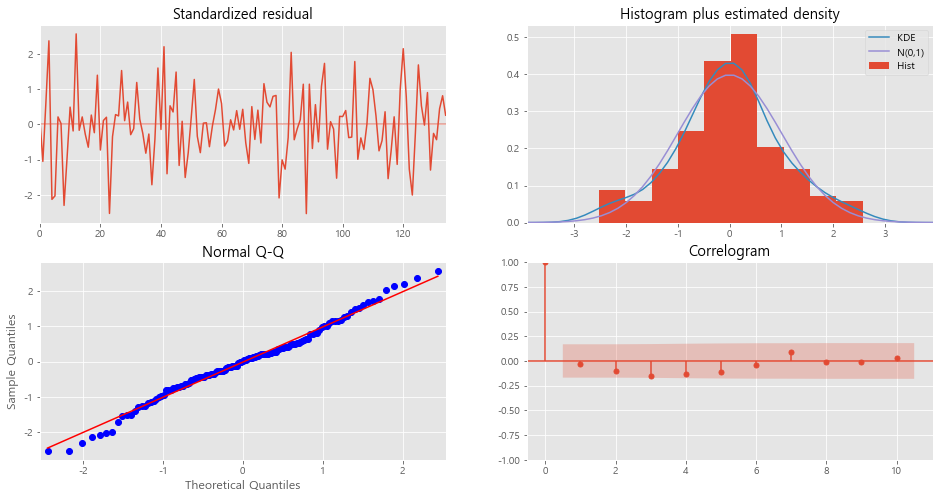

In [137]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

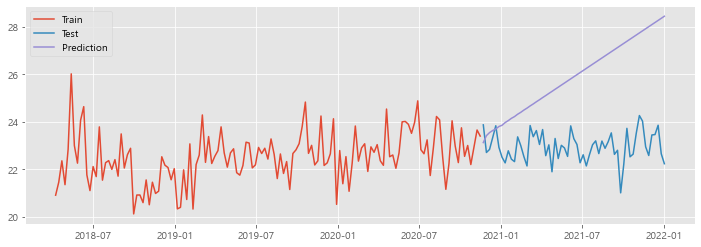

In [199]:
# 테스트 데이터 개수만큼 예측
y_predict_log = model.predict(n_periods=len(y_test_log))
y_predict_log = pd.DataFrame(y_predict_log,index = y_test_log.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train_log, label='Train')        # 훈련 데이터
plt.plot(y_test_log, label='Test')          # 테스트 데이터
plt.plot(y_predict_log, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()


In [139]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [200]:
forecasts = []
y_pred_log = []
pred_upper = []
pred_lower = []

for new_ob in y_test_log:
    fc, conf = forecast_one_step()
    y_pred_log.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

<AxesSubplot:xlabel='date'>

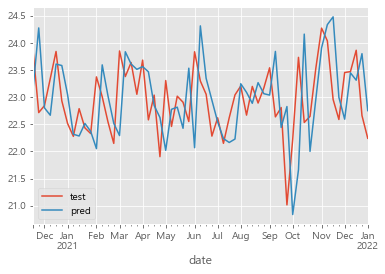

In [201]:
pd.DataFrame({"test": y_test_log, "pred": y_pred_log}).plot()

In [143]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  196
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -285.369
Date:                Fri, 18 Feb 2022   AIC                            582.738
Time:                        17:28:45   BIC                            602.346
Sample:                             0   HQIC                           590.678
                                - 196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3639      0.074    -18.351      0.000      -1.510      -1.218
ar.L2         -1.3487      0.134    -10.038      0.000      -1.612      -1.085
ar.L3         -1.1073      0.150     -7.401      0.0

In [196]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train_log.index, y = y_train_log, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test_log.index, y = y_test_log, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred_log, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(1,2,0)모형")
fig.show()

In [226]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test_log, y_pred)**0.5
np.sqrt(RMSE) #Rmse는 예측값과 실제값의 차이이므로 작을수록 좋습니다.

115511.2435196783

In [203]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test_log.values, y_pred_log)
print(R2)

-0.8741168236357773


In [202]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test_log, y_pred_log):.3f}")
# MAPE: 0.792

MAPE: 2.795


In [207]:
y_train_exp = np.exp(y_train_log)
#y_train_exp

y_test_exp = np.exp(y_test_log)

y_pred_exp = np.exp(y_pred_log)

In [210]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train_exp.index, y = y_train_exp, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test_exp.index, y = y_test_exp, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test_exp.index, y = y_pred_exp, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test_exp.index.tolist() + y_test_exp.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(1,2,0)모형")
fig.show()

## - RMSE : 큰 차이의 에러값에 대해 민감하게 반응
## - MAE : 전반적인 차이를 알 수 있지만 에러값이 큰 데이터의 영향을 반영하지 못한다. 

In [232]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test_exp, y_pred_exp)**0.5
RMSE #Rmse는 예측값과 실제값의 차이이므로 작을수록 좋습니다.

10146499137.154476

In [213]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test_exp.values, y_pred_exp)
print(R2)

-1.2573717762356162


- MAPE는 실제값과 예측값 사이의 차이를 실제값으로 나눠줌으로써 오차가 실제값에서 차지하는 상대적인 비율을 산출합니다. 그리고 해당 값을 절대값 취한 후 평균을 구합니다. 오차의 정도를 백분율 값으로 나타내기 때문에 모델의 성능을 직관적으로 이해하기 쉬우며, 타겟 변수가 여러개 일 때 각 변수별 모델의 성능을 평가하기 용이합니다.


- MAPE는 MAE에서 실제 관측값과 회귀식으로 예측한 값 차이를 회귀식으로 예측한 값으로 나눈 절대값의 합이다. MAE는 outlier에 취약할 수 있는데(한 없이 커질 수 있다는 의미이다.) MAPE는 최대 크기가 제한되므로 이를 보완한 개념이라고 볼 수 있다.

출처: https://biology-statistics-programming.tistory.com/59 [히비스서커스의 블로그]

In [214]:
def MAPE(y_test_exp, y_pred_exp):
	return np.mean(np.abs((y_test_exp - y_pred_exp) / y_test_exp)) * 100 
    
print(f"MAPE: {MAPE(y_test_exp, y_pred_exp):.3f}")
# MAPE: 0.792

MAPE: 80.503


- MPE는 실제 값에 대해 underestimates or overestimates 인지 파악할 수 있다.


MPE > 0: underperformance (underestimates)
MPE < 0: overperformance (overestimates)


회귀문제에서 RMSE가 일반적으로 선호되는 방법이지만, 상황에 맞는 다른 방식을 사용해야 합니다. 특이값이 많은 경우에는 MAE를 사용하는게 좋다.  

출처: https://kimmaadata.tistory.com/32 [Data Scientist Kimmaa's log]


In [247]:
def Mpe(y,pred):
    return np.mean((y-pred)/y)*100
print(Mpe(y_test_exp,y_pred_exp))

-41.406560232759574


In [244]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test_exp, y_pred_exp)



mse = mean_squared_error(y_test_exp, y_pred_exp) 
mae = mean_absolute_error(y_test_exp, y_pred_exp) 
rmse = mse ** 0.5 
r2 = r2_score(y_test_exp, y_pred_exp)
print("raw -> log -> exp-> raw")
print("===> mse:",mse)
print("===> mae:",mae)
print("===> rmse:",rmse)
print("===> r2:",r2)

raw -> log -> exp-> raw
===> mse: 1.0295144474027654e+20
===> mae: 7132558582.194164
===> rmse: 10146499137.154476
===> r2: -1.2573717762356162


In [246]:
from sklearn.metrics import mean_absolute_error 




mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
rmse = mse ** 0.5 
r2 = r2_score(y_test, y_pred)

print("raw")
print("===> mse:",mse)
print("===> mae:",mae)
print("===> rmse:",rmse)
print("===> r2:",r2)

raw
===> mse: 7.572716706656263e+19
===> mae: 6802587491.1102705
===> rmse: 8702135776.15074
===> r2: -0.6604368210819342


- sklearn의 r2_score의 경우 데이터가 arbitrarily할 경우 음수가 나올수 있음
- 음수가 나올경우 모두 일괄 평균으로 예측하는 것보다 모델의 성능이 떨어진다는 의미
- 이는 모델의 예측값이 평균값으로 예측하는것보다 정확하지 않을때 발생함

3,2,0

2,2,0

2,1,0

5,2,0

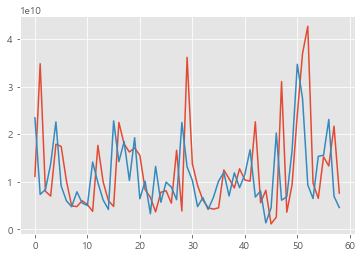

In [225]:
plt.plot(y_pred_exp)
plt.plot(y_test_exp.values)